In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cardio = pd.read_csv('cardio_train.csv', sep=';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
cardio.age = round(cardio.age / 365.25, 1)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.6,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.2,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.8,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cardio['bmi'] = cardio.weight / (cardio.height / 100)**2
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.4,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [6]:
cardio.ap_hi = abs(cardio.ap_hi)
cardio.ap_lo = abs(cardio.ap_lo)

In [7]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.302913,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.755126,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.600000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.900000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.900000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [8]:
pressure_list = []

for i in range(cardio.shape[0]):
    
    if  cardio.ap_hi[i] < 120 and cardio.ap_lo[i] < 80:

         pressure_list.append('Normal Pressure')

    elif  cardio.ap_hi[i] >= 140 and cardio.ap_lo[i] >= 90:

         pressure_list.append('Very High Pressure')

    else:

        pressure_list.append('High Pressure')        

In [9]:
cardio['pressure_level'] = pressure_list
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pressure_level
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,High Pressure
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Very High Pressure
2,2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,High Pressure
3,3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Very High Pressure
4,4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,High Pressure
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,Very High Pressure
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Very High Pressure
69998,99998,61.4,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,High Pressure


In [10]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.302913,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.755126,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.600000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.900000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.900000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


Check gender number

In [11]:
cardio.groupby('gender')[['height']].mean()

,height
gender,
1,161.355612
2,169.947895


Then 2 represents Males and 1 for Females

In [12]:
def gender_func(x):

    if x == 2:

        return 'Male'

    elif x == 1:

        return 'Female'

In [13]:
cardio.gender = cardio.gender.apply(gender_func)
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pressure_level
0,0,50.4,Male,168,62.0,110,80,1,1,0,0,1,0,21.967120,High Pressure
1,1,55.4,Female,156,85.0,140,90,3,1,0,0,1,1,34.927679,Very High Pressure
2,2,51.6,Female,165,64.0,130,70,3,1,0,0,0,1,23.507805,High Pressure
3,3,48.2,Male,169,82.0,150,100,1,1,0,0,1,1,28.710479,Very High Pressure
4,4,47.8,Female,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,Male,168,76.0,120,80,1,1,1,0,1,0,26.927438,High Pressure
69996,99995,61.9,Female,158,126.0,140,90,2,2,0,0,1,1,50.472681,Very High Pressure
69997,99996,52.2,Male,183,105.0,180,90,3,1,0,1,0,1,31.353579,Very High Pressure
69998,99998,61.4,Female,163,72.0,135,80,1,2,0,0,0,1,27.099251,High Pressure


In [14]:
def cholest_func(x):

    if x == 1:

        return 'Normal'

    elif x == 2:

        return 'Above Normal'

    elif x ==3:

        return 'Well Above'

In [15]:
cardio.cholesterol = cardio.cholesterol.apply(cholest_func)
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pressure_level
0,0,50.4,Male,168,62.0,110,80,Normal,1,0,0,1,0,21.967120,High Pressure
1,1,55.4,Female,156,85.0,140,90,Well Above,1,0,0,1,1,34.927679,Very High Pressure
2,2,51.6,Female,165,64.0,130,70,Well Above,1,0,0,0,1,23.507805,High Pressure
3,3,48.2,Male,169,82.0,150,100,Normal,1,0,0,1,1,28.710479,Very High Pressure
4,4,47.8,Female,156,56.0,100,60,Normal,1,0,0,0,0,23.011177,Normal Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,Male,168,76.0,120,80,Normal,1,1,0,1,0,26.927438,High Pressure
69996,99995,61.9,Female,158,126.0,140,90,Above Normal,2,0,0,1,1,50.472681,Very High Pressure
69997,99996,52.2,Male,183,105.0,180,90,Well Above,1,0,1,0,1,31.353579,Very High Pressure
69998,99998,61.4,Female,163,72.0,135,80,Normal,2,0,0,0,1,27.099251,High Pressure


In [16]:
def gluc_func(x):

    if x == 1:

        return 'Normal'

    elif x == 2:

        return 'Above Normal'

    elif x ==3:

        return 'Well Above'

In [17]:
cardio.gluc = cardio.gluc.apply(gluc_func)
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pressure_level
0,0,50.4,Male,168,62.0,110,80,Normal,Normal,0,0,1,0,21.967120,High Pressure
1,1,55.4,Female,156,85.0,140,90,Well Above,Normal,0,0,1,1,34.927679,Very High Pressure
2,2,51.6,Female,165,64.0,130,70,Well Above,Normal,0,0,0,1,23.507805,High Pressure
3,3,48.2,Male,169,82.0,150,100,Normal,Normal,0,0,1,1,28.710479,Very High Pressure
4,4,47.8,Female,156,56.0,100,60,Normal,Normal,0,0,0,0,23.011177,Normal Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,Male,168,76.0,120,80,Normal,Normal,1,0,1,0,26.927438,High Pressure
69996,99995,61.9,Female,158,126.0,140,90,Above Normal,Above Normal,0,0,1,1,50.472681,Very High Pressure
69997,99996,52.2,Male,183,105.0,180,90,Well Above,Normal,0,1,0,1,31.353579,Very High Pressure
69998,99998,61.4,Female,163,72.0,135,80,Normal,Above Normal,0,0,0,1,27.099251,High Pressure


In [18]:
cardio.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.302913,164.359229,74.205690,128.841429,96.632414,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.755126,8.210126,14.395757,153.991223,188.471505,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.600000,55.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.400000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.900000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.400000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.900000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,298.666667


<AxesSubplot:xlabel='cardio', ylabel='age'>

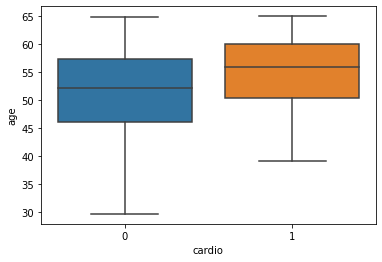

In [109]:
sns.boxplot(x ='cardio', y='age', data=cardio)

As shown on the graph disease occurce roughly for people 40 years old and above and specially from 50 to 60 years old.

<AxesSubplot:xlabel='gender', ylabel='count'>

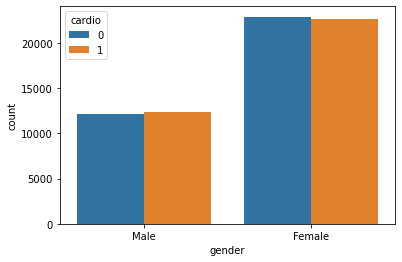

In [32]:
sns.countplot(x= cardio.gender, hue= cardio.cardio)

As shown on the graph females have higher possibilities to have the disease than men.

<AxesSubplot:xlabel='pressure_level', ylabel='count'>

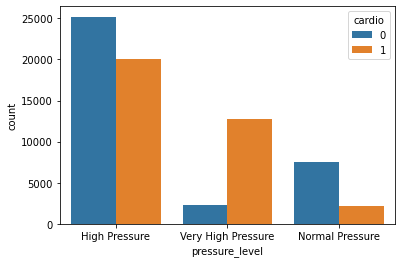

In [51]:
sns.countplot(x= 'pressure_level', hue= 'cardio', data= cardio)

As shown on the graph above people who have high pressure have more possibilities to have the disease.

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

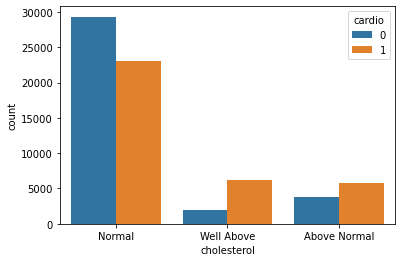

In [52]:
sns.countplot(x= cardio.cholesterol, hue= cardio.cardio)

As shown on the graph above people who have high cholestrol level have more possibilities to have the disease.

<AxesSubplot:xlabel='gluc', ylabel='count'>

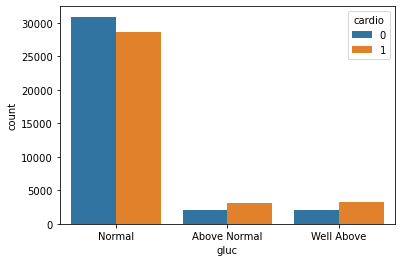

In [53]:
sns.countplot(x=cardio.gluc, hue= cardio.cardio)

As shown on the graph above people who have high glucose have more possibilities to have the disease.

In [71]:
smoke_alcho = cardio.groupby('cardio')[['smoke', 'alco']].count()
smoke_alcho
#sns.countplot(x= cardio.smoke, hue= cardio.cardio)

,smoke,alco
cardio,,
0,35021,35021
1,34979,34979


<AxesSubplot:xlabel='smoke', ylabel='count'>

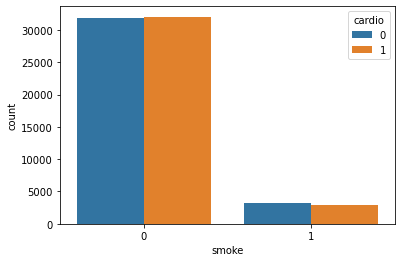

In [98]:
sns.countplot(x= cardio.smoke, hue= cardio.cardio)

As show from the graph smokers tend to have more possibilities to have the disease

<AxesSubplot:xlabel='alco', ylabel='count'>

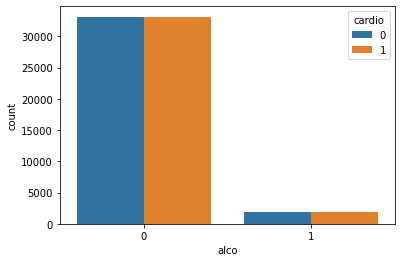

In [99]:
sns.countplot(x= cardio.alco, hue= cardio.cardio)

As show from the graph people who drink alcohol tend to have more possibilities to have the disease

<AxesSubplot:xlabel='active', ylabel='count'>

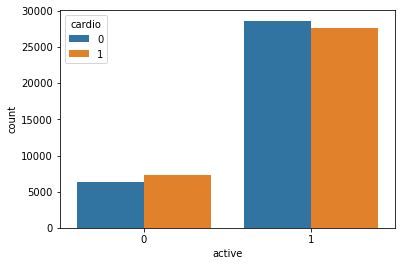

In [100]:
sns.countplot(x= cardio.active, hue= cardio.cardio)

As shown on the graph people who have the disease tend to be less active

<AxesSubplot:xlabel='cardio', ylabel='bmi'>

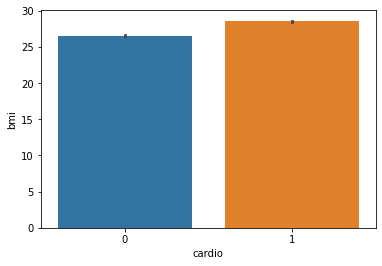

In [101]:
sns.barplot(x= cardio.cardio, y= cardio.bmi)

As show from the graph people with high bmi tend to have more possibilities the have the disease